<a href="https://colab.research.google.com/github/vidhu-psit/MachineLearning/blob/master/Linear_Regression/Class2/LR_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing numpy and pandas
import numpy as np
import pandas as pd

In [ ]:
!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 17.8MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [ ]:
!gdown 1RRbLfbAPiihXP50KDQQc6Cr52-r0fsoF

Downloading...
From: https://drive.google.com/uc?id=1RRbLfbAPiihXP50KDQQc6Cr52-r0fsoF
To: /content/train-cars24-car-price.csv
100% 1.25M/1.25M [00:00<00:00, 119MB/s]


In [ ]:
# Displaying our data
import pandas as pd
import numpy as np
data = pd.read_csv('/content/train-cars24-car-price.csv')
data.head()

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti SX4 Zxi BSIII,2.85,2007.0,Individual,110000,Petrol,Manual,15.00,1586.0,104.68,5.0
1,Hyundai i20 Sportz 1.4 CRDi,4.70,2012.0,Dealer,70000,Diesel,Manual,21.90,1396.0,88.76,5.0
2,Maruti Swift VDI BSIV,5.25,2015.0,Individual,70000,Diesel,Manual,25.20,1248.0,74.00,5.0
3,Honda City 1.3 EXI,1.25,2005.0,Individual,90000,Petrol,Manual,13.00,1343.0,90.00,5.0
4,Volkswagen Polo 1.2 MPI Comfortline,4.65,2015.0,Dealer,41000,Petrol,Manual,16.47,1198.0,74.00,5.0


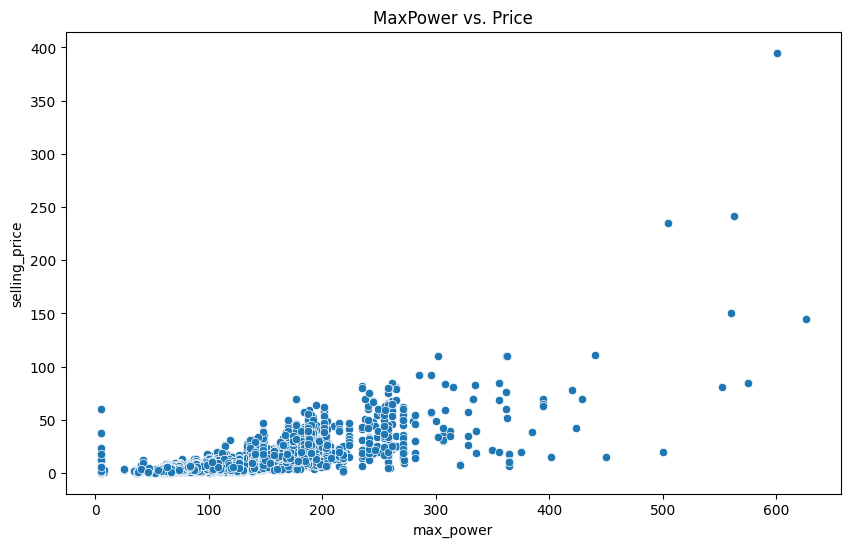

In [ ]:
# using single feature to predict selling price of a car
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.title('MaxPower vs. Price')
sns.scatterplot(data=data, x='max_power', y='selling_price');

In [ ]:
def estimate_charges(maxpower, m, c):
    #      m    x       + c
    return m * maxpower + c

In [ ]:
104.68*50 +100

5334.0

In [ ]:
88.76*50 +100

4538.0

In [ ]:
m = 50 #random values of m and c
c = 100

In [ ]:
data.max_power

,max_power
0,104.68
1,88.76
2,74.00
3,90.00
4,74.00
...,...
13981,103.20
13982,82.00
13983,83.14
13984,63.00


In [ ]:
maxpower = data.max_power # x values
estimated_charges = estimate_charges(maxpower, m, c)

In [ ]:
estimated_charges

,max_power
0,5334.0
1,4538.0
2,3800.0
3,4600.0
4,3800.0
...,...
13981,5260.0
13982,4200.0
13983,4257.0
13984,3250.0


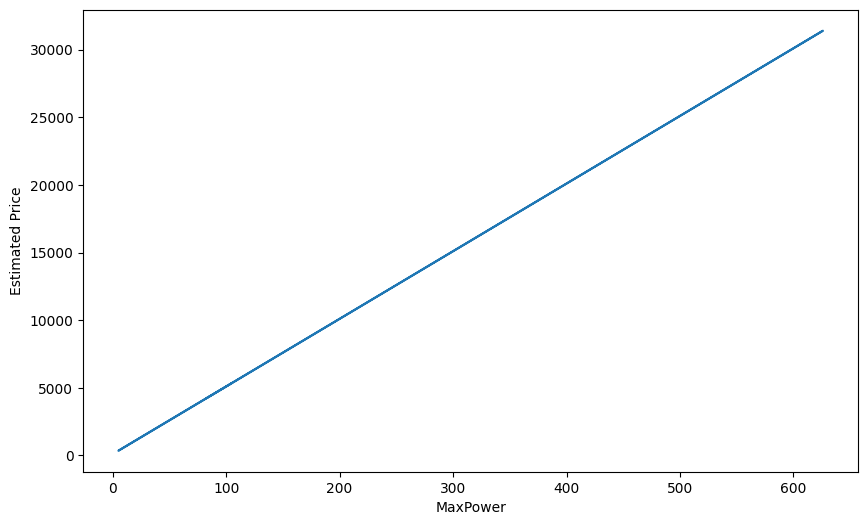

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(maxpower, estimated_charges);
plt.xlabel('MaxPower');
plt.ylabel('Estimated Price');

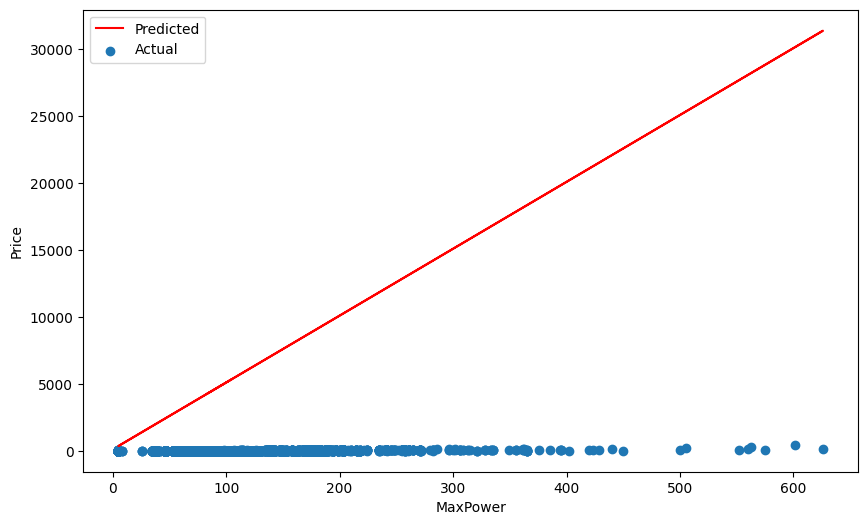

In [ ]:
target = data.selling_price

plt.figure(figsize=(10,6))

plt.plot(maxpower, estimated_charges,"red") #predicted line
plt.scatter(maxpower, target) # scatter plot - my actual data
plt.xlabel('MaxPower');
plt.ylabel('Price')
plt.legend(['Predicted', 'Actual']);

In [ ]:
def try_parameters(w, b):
    maxpower = data.max_power
    target = data.selling_price

    estimated_charges = estimate_charges(maxpower, w, b)
    plt.figure(figsize=(10,6))
    plt.plot(maxpower, estimated_charges, 'r', );
    plt.scatter(maxpower, target,);
    plt.xlabel('MaxPower');
    plt.ylabel('Price')
    plt.legend(['Estimate', 'Actual']);

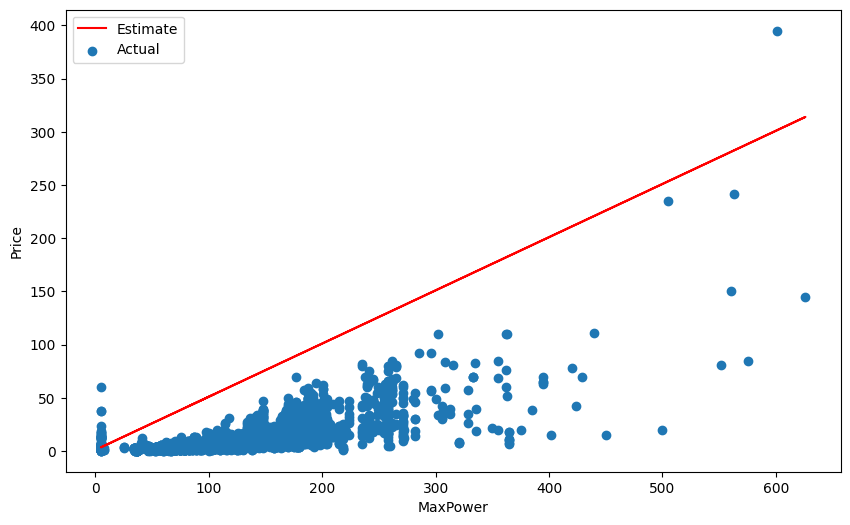

In [ ]:
try_parameters(0.5, 1)

In [ ]:
#error - x^2
#random value of x
old_x = 5
step_size = 0.1

new_x = old_x - (step_size * (2* old_x ))
new_x

4.0

In [ ]:
#error - x^2
#random value of x
x = 5
step_size = 0.1

for i in range(200):
  x = x - (step_size * (2* x ))
  print(x)

4.0
3.2
2.56
2.048
1.6384
1.31072
1.0485760000000002
0.8388608000000002
0.6710886400000001
0.5368709120000001
0.4294967296000001
0.3435973836800001
0.27487790694400005
0.21990232555520003
0.17592186044416003
0.140737488355328
0.11258999068426241
0.09007199254740993
0.07205759403792794
0.057646075230342354
0.04611686018427388
0.03689348814741911
0.029514790517935284
0.02361183241434823
0.018889465931478583
0.015111572745182867
0.012089258196146294
0.009671406556917036
0.007737125245533628
0.006189700196426903
0.004951760157141522
0.003961408125713218
0.0031691265005705745
0.00253530120045646
0.0020282409603651678
0.0016225927682921343
0.0012980742146337075
0.001038459371706966
0.0008307674973655728
0.0006646139978924582
0.0005316911983139665
0.00042535295865117324
0.0003402823669209386
0.00027222589353675085
0.0002177807148294007
0.00017422457186352054
0.00013937965749081642
0.00011150372599265314
8.920298079412252e-05
7.136238463529802e-05
5.7089907708238416e-05
4.567192616659073e-05
3

In [ ]:
#error - x^2
#random value of x
x = 5
step_size = 0.1

for i in range(20):
  x = x - (step_size * (2* x ))
  print(x)

4.0
3.2
2.56
2.048
1.6384
1.31072
1.0485760000000002
0.8388608000000002
0.6710886400000001
0.5368709120000001
0.4294967296000001
0.3435973836800001
0.27487790694400005
0.21990232555520003
0.17592186044416003
0.140737488355328
0.11258999068426241
0.09007199254740993
0.07205759403792794
0.057646075230342354
